# Cardiovascular Disease Dataset (kaggle)

The dataset consists of **70 000 records of patients data, 11 features + target**.

Our task is to detect the presence or absence of cardiovascular disease in person based on given features.
Features available are:


- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


There are 3 types of input features:
- Objective: factual information;
- Examination: results of medical examination;
- Subjective: information given by the patient.

Data Source:https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

## 1) IMPORT LIBRARIES AND DATASETS

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the csv file 
cardio_df = pd.read_csv("cardio_train.csv", sep=";")

In [3]:
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## 2) EDA

In [4]:
# Drop id
cardio_df = cardio_df.drop(columns = 'id')

In [5]:
# Convert "age" it into years
cardio_df['age'] = cardio_df['age']/365

In [6]:
# Check
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
cardio_df.tail()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,52.712329,2,168,76.0,120,80,1,1,1,0,1,0
69996,61.920548,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.235616,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.454795,1,163,72.0,135,80,1,2,0,0,0,1
69999,56.273973,1,170,72.0,120,80,2,1,0,0,1,0


In [7]:
# Checking for missing values
cardio_df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
# Checking dataframe information
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


In [10]:
# Statistical summary of the dataframe
cardio_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## 3) PLOTTINGS

MINI CHALLENGE
- plot the histogram for all features (use 20 bins) 
- plot the correlation matrix and indicate if there exists any correlations between features

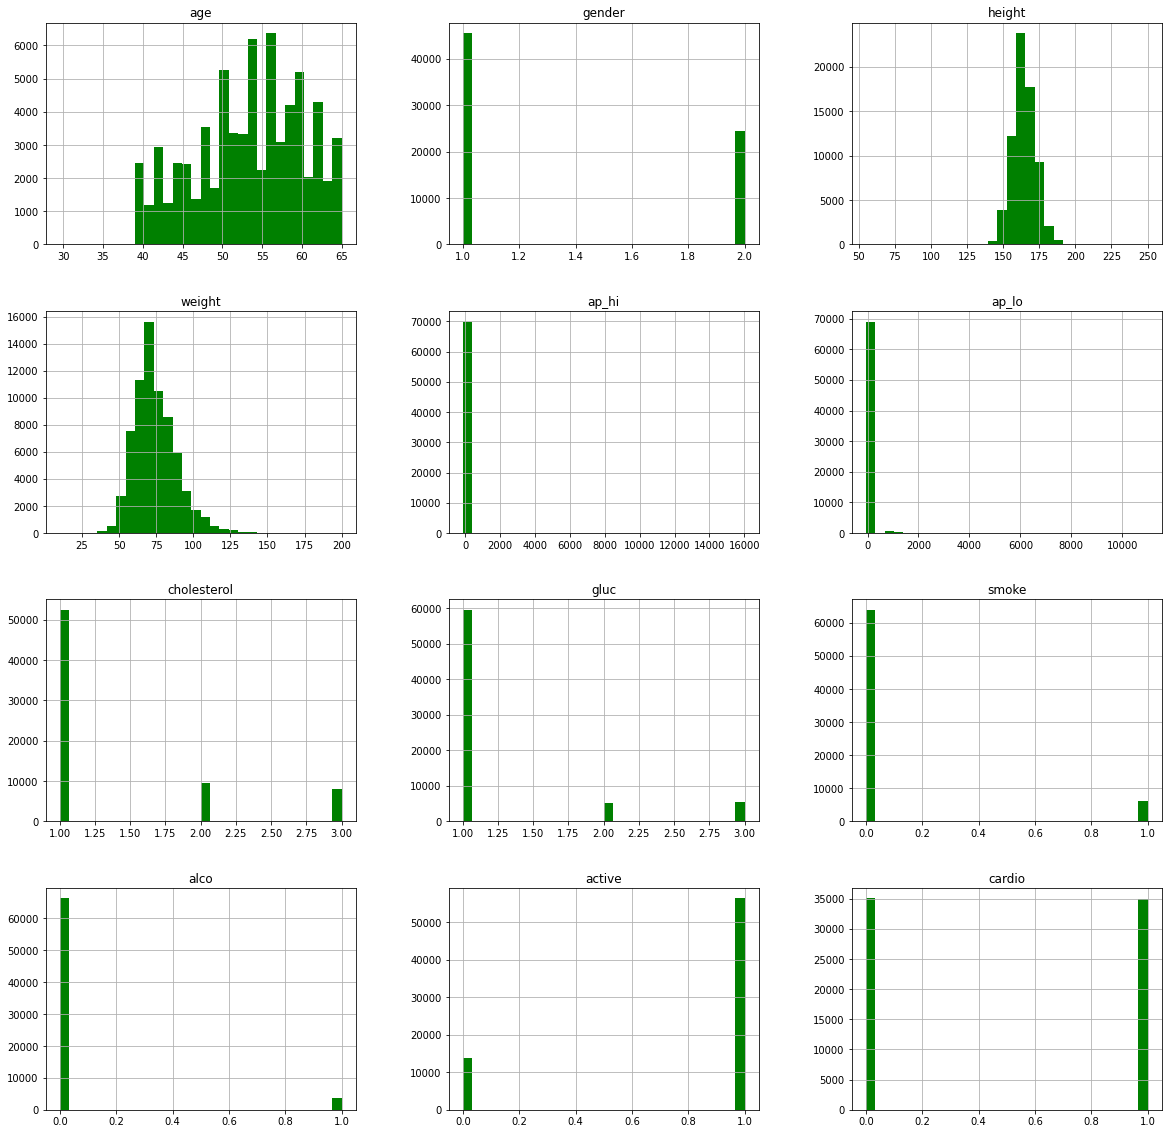

In [14]:
cardio_df.hist(bins=30, figsize=(20,20), color = 'g');

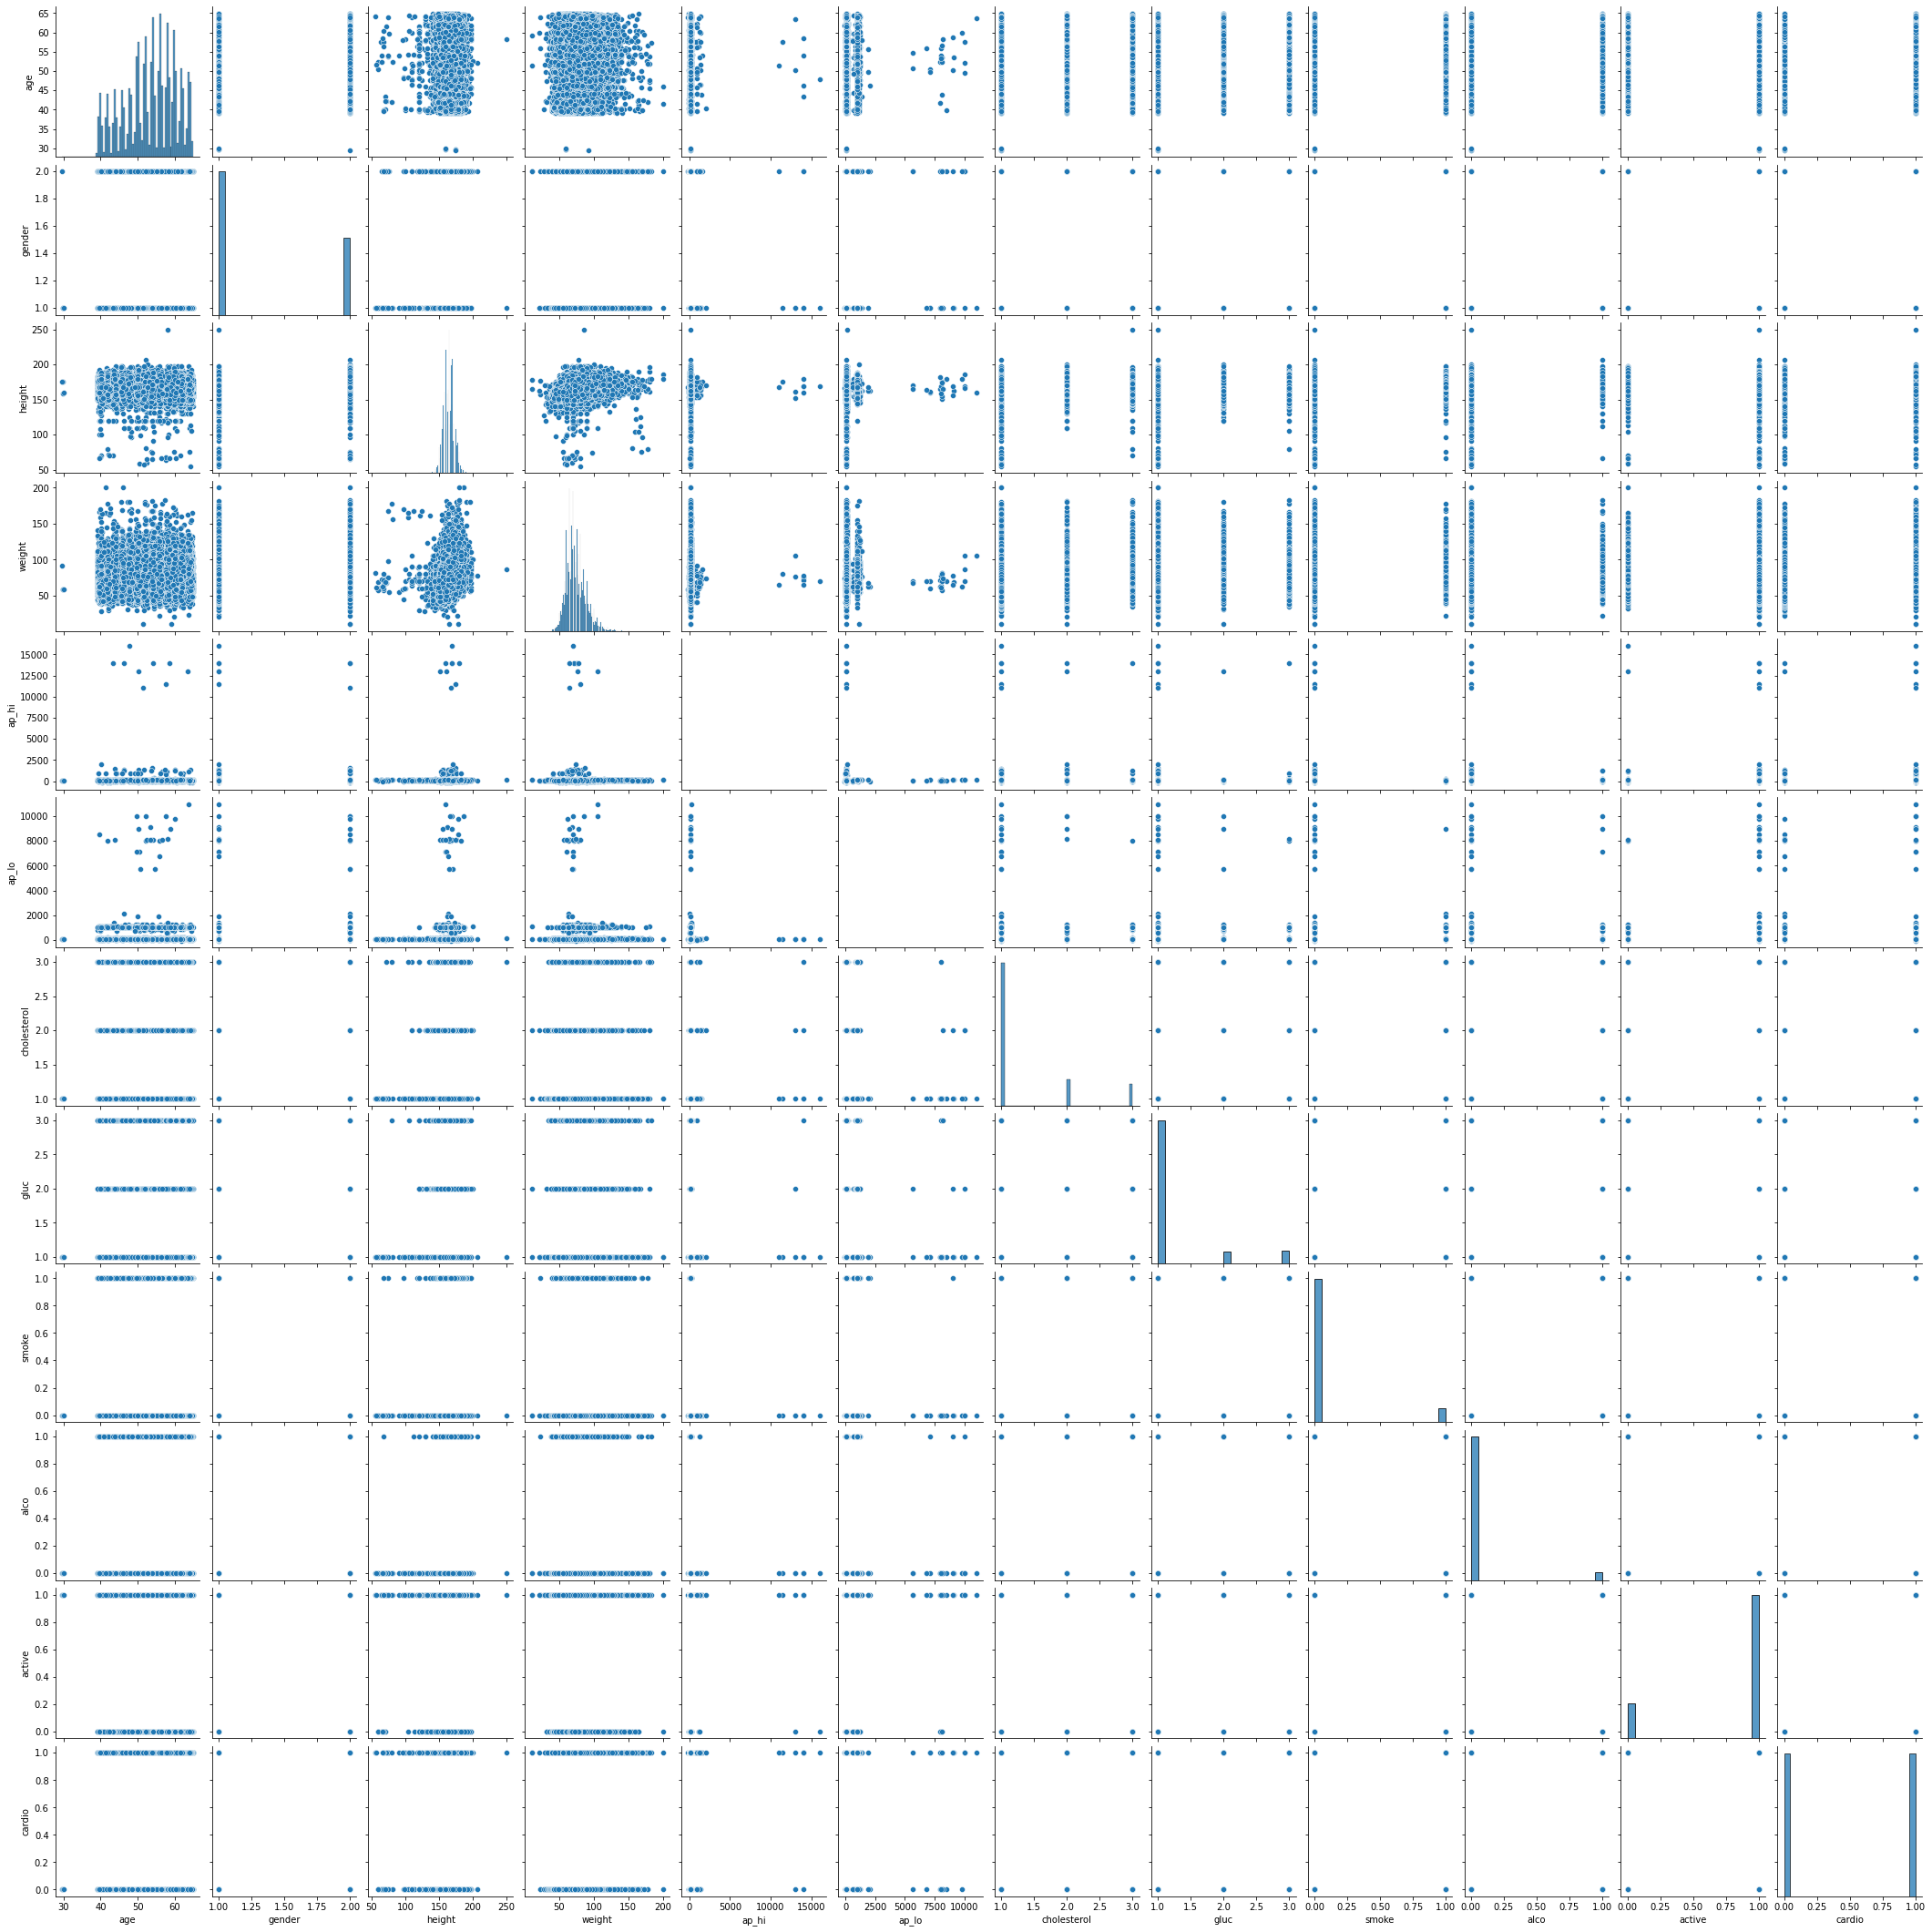

In [15]:
sns.pairplot(cardio_df)

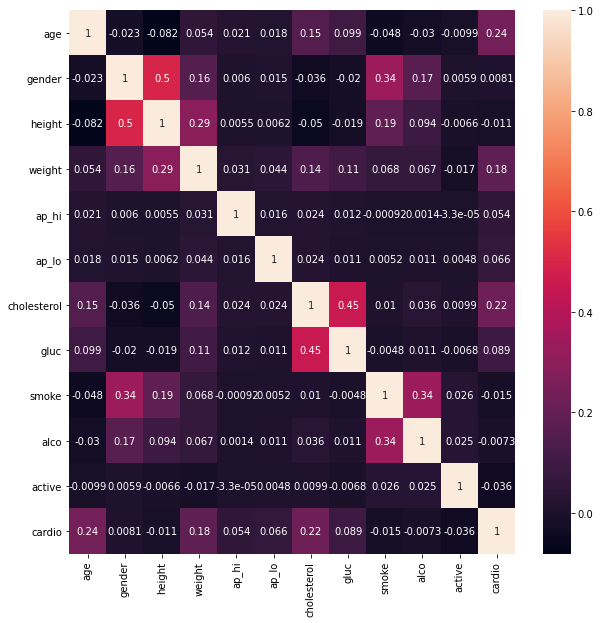

In [17]:
plt.figure(figsize=(10,10))
corr_matrix = cardio_df.corr()
sns.heatmap(corr_matrix, annot = True);

## 4) CREATE TRAINING AND TESTING DATASET

In [18]:
# split the dataframe into target and features
df_target = cardio_df['cardio']
df_features = cardio_df.drop(columns =['cardio'])

In [19]:
cardio_df.shape

(70000, 12)

In [20]:
df_features.shape

(70000, 11)

In [21]:
df_target.shape

(70000,)

In [22]:
#spliting the data in to test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size = 0.2)

In [23]:
X_train.shape

(56000, 11)

In [24]:
y_train.shape

(56000,)

In [25]:
X_test.shape

(14000, 11)

In [26]:
X_test.shape

(14000, 11)

## 5) TRAIN AND TEST XGBOOST MODEL IN LOCAL MODE

In [27]:
# install xgboost

!pip install xgboost

In [28]:
# XGBoost is based on trees so is not sensitive to data normalization.
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=50, max_depth=3, objective='binary:logistic')
#model = XGBClassifier()

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [29]:
# make predictions on test data

predict = model.predict(X_test)

In [30]:
predict

array([0, 1, 0, ..., 0, 1, 1])

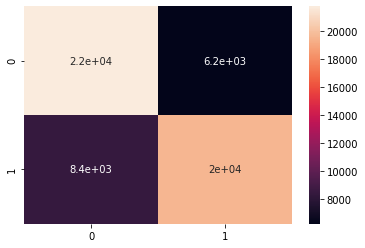

In [31]:
# Assess trained model performance on Training set
predict_train = model.predict(X_train)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, predict_train)
plt.figure()
sns.heatmap(cm, annot=True)

In [32]:
# print metrics for Training set
from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Precision = {}".format(precision_score(y_train, predict_train)))
print("Recall = {}".format(recall_score(y_train, predict_train)))
print("Accuracy = {}".format(accuracy_score(y_train, predict_train)))

Precision = 0.7588331008833101
Recall = 0.6990613512259538
Accuracy = 0.7382678571428571


In [33]:
# print metrics for Test set

print("Precision = {}".format(precision_score(y_test, predict)))
print("Recall = {}".format(recall_score(y_test, predict)))
print("Accuracy = {}".format(accuracy_score(y_test, predict)))

Precision = 0.7528159234686005
Recall = 0.7010057471264368
Accuracy = 0.7369285714285714


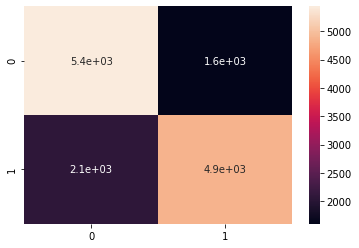

In [34]:
# plot the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
plt.figure()
sns.heatmap(cm, annot=True)

In [35]:
param_grid = {
        'gamma': [0.5, 1, 5],
        'n_estimators': [100, 200, 350, 500],
        'max_depth': [3, 4, 5]
        }

In [36]:
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier(objective='binary:logistic')
grid = GridSearchCV(xgb_model, param_grid, verbose = 4)

In [37]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] gamma=0.5, max_depth=3, n_estimators=100 ........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  gamma=0.5, max_depth=3, n_estimators=100, score=0.737, total=   2.2s
[CV] gamma=0.5, max_depth=3, n_estimators=100 ........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  gamma=0.5, max_depth=3, n_estimators=100, score=0.737, total=   2.2s
[CV] gamma=0.5, max_depth=3, n_estimators=100 ........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


[CV]  gamma=0.5, max_depth=3, n_estimators=100, score=0.728, total=   2.2s
[CV] gamma=0.5, max_depth=3, n_estimators=100 ........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.6s remaining:    0.0s


[CV]  gamma=0.5, max_depth=3, n_estimators=100, score=0.741, total=   2.2s
[CV] gamma=0.5, max_depth=3, n_estimators=100 ........................
[CV]  gamma=0.5, max_depth=3, n_estimators=100, score=0.730, total=   2.2s
[CV] gamma=0.5, max_depth=3, n_estimators=200 ........................
[CV]  gamma=0.5, max_depth=3, n_estimators=200, score=0.738, total=   4.2s
[CV] gamma=0.5, max_depth=3, n_estimators=200 ........................
[CV]  gamma=0.5, max_depth=3, n_estimators=200, score=0.738, total=   4.2s
[CV] gamma=0.5, max_depth=3, n_estimators=200 ........................
[CV]  gamma=0.5, max_depth=3, n_estimators=200, score=0.730, total=   4.2s
[CV] gamma=0.5, max_depth=3, n_estimators=200 ........................
[CV]  gamma=0.5, max_depth=3, n_estimators=200, score=0.741, total=   4.2s
[CV] gamma=0.5, max_depth=3, n_estimators=200 ........................
[CV]  gamma=0.5, max_depth=3, n_estimators=200, score=0.728, total=   4.2s
[CV] gamma=0.5, max_depth=3, n_estimators=350 ...

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 21.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0.5, 1, 5], 'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 350, 500]},
             pre_dispatch='2*n_jobs', r

In [38]:
y_predict_optim = grid.predict(X_test)

In [39]:
y_predict_optim

array([0, 1, 0, ..., 0, 1, 1])

In [40]:
# print metrics for testing dataset

print("Precision = {}".format(precision_score(y_test, y_predict_optim)))
print("Recall = {}".format(recall_score(y_test, y_predict_optim)))
print("Accuracy = {}".format(accuracy_score(y_test, y_predict_optim)))

Precision = 0.7577708006279434
Recall = 0.6935344827586207
Accuracy = 0.7374285714285714


In [41]:
# Print the best estimator
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=350, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [42]:
# Print Best Parameters
grid.best_params_

{'gamma': 1, 'max_depth': 5, 'n_estimators': 350}